# HW6 - PIL Example

One problem to solve is how to read the images.  Here's some examples (inspired by googling and messing around)

Here's an example using PIL to process the image available here:

https://github.com/mdaugherity/PatternRecognition2020/blob/master/Homework/class_digits_crop.png

I cropped it in paint to make it easier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

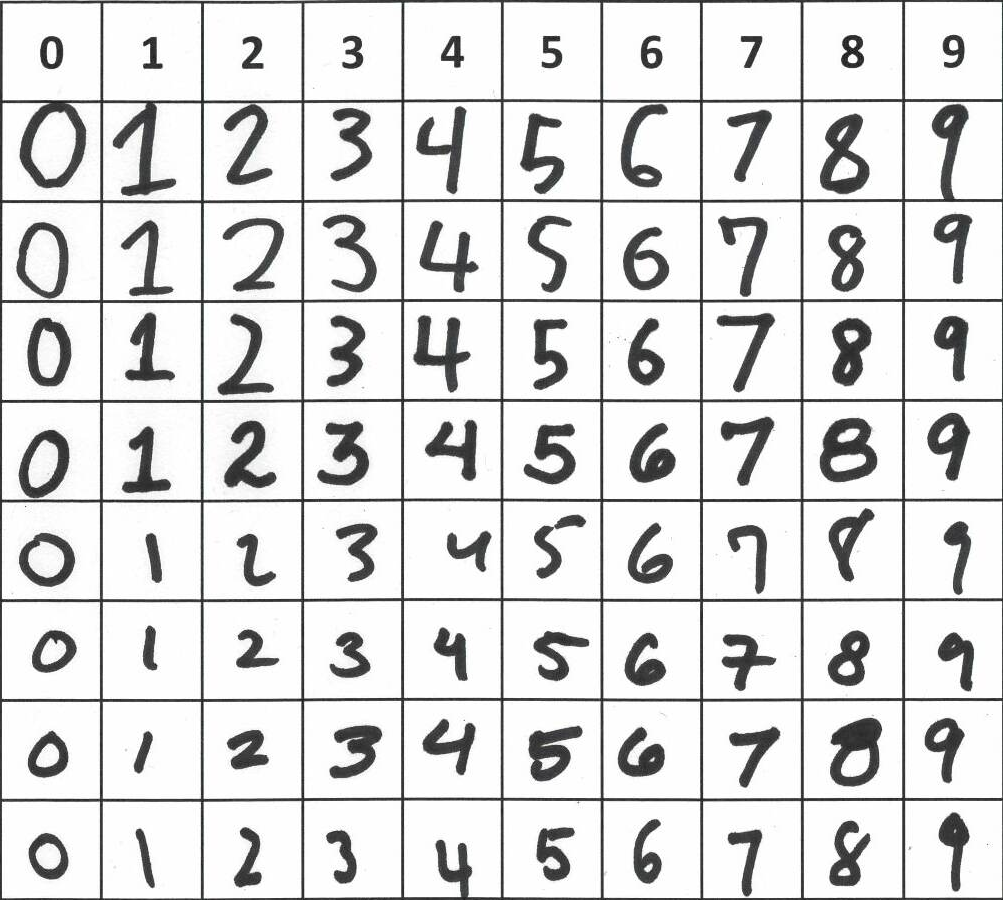

In [6]:
im = Image.open("class_digits_crop.png")
im

Convert from RGB to grayscale


In [7]:
im = im.convert('L')

You can either use an external program to crop out individual digits or use PIL `crop`.  It is a lot easier if you start with a cropped image.

Also, the grid is a half inch square scanned at 200 dpi, so each square should be 100 pixels 

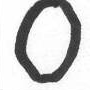

In [16]:
x1=5
y1=105
xwidth = 90
ywidth = 90
im0 = im.crop(box=(x1,y1,x1+xwidth,y1+ywidth))
im0

Not perfect, but good enough for now.  Resize to 8x8

In [28]:
im0 = im0.resize((8,8))
im0

In [34]:
X0 = np.array(im0) # convert from image to array
print(X0)

[[254 255 210  85 130  99 183 255]
 [255 248 100 175 255 213 107 239]
 [255 190 105 253 255 255 117 199]
 [255 135 159 255 254 254 116 205]
 [255 118 175 255 255 233 101 234]
 [255 185 104 246 255 158 153 255]
 [254 255 142 123 143 112 242 255]
 [254 255 245 174 171 230 255 253]]


We need to rescale so the pixels go from 0-15.  

[[15. 15. 12.  5.  8.  6. 11. 15.]
 [15. 15.  6. 10. 15. 13.  6. 14.]
 [15. 11.  6. 15. 15. 15.  7. 12.]
 [15.  8.  9. 15. 15. 15.  7. 12.]
 [15.  7. 10. 15. 15. 14.  6. 14.]
 [15. 11.  6. 14. 15.  9.  9. 15.]
 [15. 15.  8.  7.  8.  7. 14. 15.]
 [15. 15. 14. 10. 10. 14. 15. 15.]]


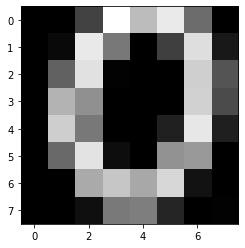

In [35]:
X0 = X0/255*15
print(np.round(X0))
plt.imshow(X0, cmap=plt.cm.binary)
plt.show()

Oops.  It is inverted.  

[[ 0.  0.  3. 10.  7.  9.  4.  0.]
 [ 0.  0.  9.  5.  0.  2.  9.  1.]
 [ 0.  4.  9.  0.  0.  0.  8.  3.]
 [ 0.  7.  6.  0.  0.  0.  8.  3.]
 [ 0.  8.  5.  0.  0.  1.  9.  1.]
 [ 0.  4.  9.  1.  0.  6.  6.  0.]
 [ 0.  0.  7.  8.  7.  8.  1.  0.]
 [ 0.  0.  1.  5.  5.  1.  0.  0.]]


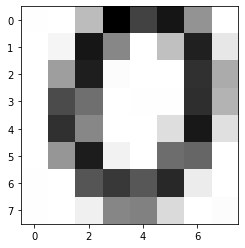

In [36]:
X0 = 15 - X0
print(np.round(X0))
plt.imshow(X0, cmap=plt.cm.binary)
plt.show()